<a href="https://colab.research.google.com/github/Mariyaben/Vector-based-Retreival-Methods-and-Re-ranking/blob/main/Vector_based_retrieval_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TF-IDF (Term Frequency-Inverse Document Frequency)

Retrieval method ranks documents based on the relevance of terms within a query. It calculates a numerical value for each term in the document, weighing the frequency of occurrence (TF) against how commonly the term appears across all documents (IDF). Documents are ranked by the TF-IDF score, prioritizing those that contain rare terms specific to the query, thereby emphasizing content relevance in information retrieval tasks.








In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.2 MB/s eta 0:00:00


In [ ]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Extract text from PDFs
pdf_paths = ['icici_q1_by_idbi.pdf', 'icici_q2_by_idbi.pdf', 'icici_q3_by_idbi.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Sample query
query = "credit growth"
query_vec = vectorizer.transform([query])

# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# Get document rankings
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
for idx in ranked_doc_indices:
    print(f"Document {idx+1} (Similarity: {cosine_similarities[idx]}):\n{documents[idx][:500]}...\n")


Document 1 (Similarity: 0.09400079614473934):
Q1FY24 Result Review
ICICI Bank B U Y
T P Rs.1,240 Key Stock Data
CMP Rs.997 ICICIBC IN/ICBK.BO
NIMs declined QoQ; RoA sustained at multi quarter high Potential upside/downside 24% Sector Banking
Previous Rating BUY
Shares o/s (mn) 6,997
Summary Market cap. (Rs mn) 6,974,300
Price Performance (%)
ICICI Bank’s (one of our top picks) reported decline in NIMs by 12bps QoQ to 223.7
-1m -3m -12m
4.78% during Q1FY24 led by higher cost of deposits. Asset quality remain stable Absolute 7.7 12.7 24.6 52-...

Document 3 (Similarity: 0.08827247110569822):
Q3FY24 Result Review
ICICI Bank B U Y
T P Rs.1,350 Key Stock Data
CMP Rs.1,008 ICICIBC IN/ICBK.BO
NIMs continue to decline; Asset quality improved Potential upside/downside 34% Sector Banking
Previous Rating BUY
Shares o/s (mn) 7,016
Summary Market cap. (Rs mn) 7,073,901
Price Performance (%)
ICICI Bank’s (one of our top picks) NIM continue to decline during Q3FY24 led by 183.0
-1m -3m -12m
higher co

In [ ]:
import matplotlib.pyplot as plt

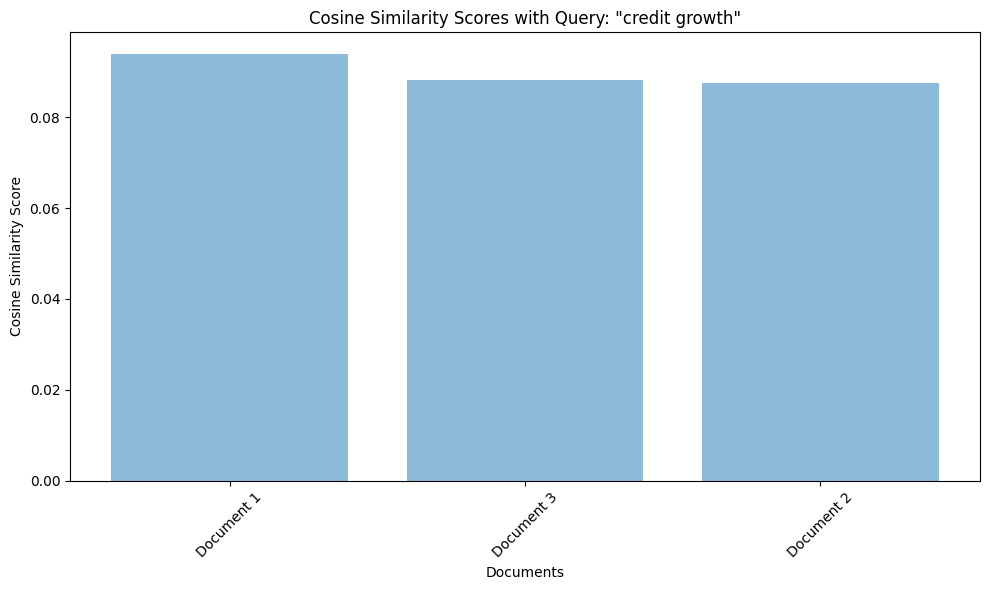

In [ ]:
# Output the ranking of documents and plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranked_doc_indices)), cosine_similarities[ranked_doc_indices], align='center', alpha=0.5)
plt.xticks(range(len(ranked_doc_indices)), [f"Document {idx+1}" for idx in ranked_doc_indices], rotation=45)
plt.xlabel('Documents')
plt.ylabel('Cosine Similarity Score')
plt.title('Cosine Similarity Scores with Query: "credit growth"')
plt.tight_layout()
plt.show()

# Latent Semantic Indexing

LSI for text retrieval involves first constructing a term-document matrix from a corpus of documents, followed by applying singular value decomposition (SVD) to reduce the dimensionality of this matrix. This reduction captures latent semantic relationships among terms and documents, allowing for improved retrieval by considering semantic similarity rather than just exact term matches. Querying in LSI retrieves documents based on their relevance in the reduced semantic space, enhancing the accuracy of information retrieval systems.












In [ ]:
!pip install scikit-learn


In [ ]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Extract text from PDFs
pdf_paths = ['icici_q1_by_idbi.pdf', 'icici_q2_by_idbi.pdf', 'icici_q3_by_idbi.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Apply LSI (using TruncatedSVD)
n_components = 2  # Number of dimensions for LSI
lsa = TruncatedSVD(n_components=n_components)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Sample query
query = "credit growth"
query_vec = vectorizer.transform([query])
query_lsa = lsa.transform(query_vec)

# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_lsa, lsa_matrix).flatten()

# Get document rankings
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
ranked_documents = [(idx+1, cosine_similarities[idx], documents[idx][:500]) for idx in ranked_doc_indices]
ranked_documents


[(2,
  0.9922506733016524,
  'Q2FY24 Result Review\nICICI Bank B U Y\nT P Rs.1,240 Key Stock Data\nCMP Rs.932 ICICIBC IN/ICBK.BO\nNIMs further declined QoQ; RoA remains at high level Potential upside/downside 33% Sector Banking\nPrevious Rating BUY\nShares o/s (mn) 7,005\nSummary Market cap. (Rs mn) 6,531,448\nPrice Performance (%)\nICICI Bank’s (one of our top picks) reported further decline in NIMs by 25bps 359.5\n-1m -3m -12m\nQoQ to 4.53% during Q2FY24 led by higher cost of deposits. Asset quality 52-week high / low Rs1,009 / 796\nA'),
 (1,
  0.9633195498576926,
  'Q1FY24 Result Review\nICICI Bank B U Y\nT P Rs.1,240 Key Stock Data\nCMP Rs.997 ICICIBC IN/ICBK.BO\nNIMs declined QoQ; RoA sustained at multi quarter high Potential upside/downside 24% Sector Banking\nPrevious Rating BUY\nShares o/s (mn) 6,997\nSummary Market cap. (Rs mn) 6,974,300\nPrice Performance (%)\nICICI Bank’s (one of our top picks) reported decline in NIMs by 12bps QoQ to 223.7\n-1m -3m -12m\n4.78% during Q1FY24

[(2, 0.992250673301654, 'Q2FY24 Result Review\nICICI Bank B U Y\nT P Rs.1,240 Key Stock Data\nCMP Rs.932 ICICIBC IN/ICBK.BO\nNIMs further declined QoQ; RoA remains at high level Potential upside/downside 33% Sector Banking\nPrevious Rating BUY\nShares o/s (mn) 7,005\nSummary Market cap. (Rs mn) 6,531,448\nPrice Performance (%)\nICICI Bank’s (one of our top picks) reported further decline in NIMs by 25bps 359.5\n-1m -3m -12m\nQoQ to 4.53% during Q2FY24 led by higher cost of deposits. Asset quality 52-week high / low Rs1,009 / 796\nA'), (1, 0.9633195498576929, 'Q1FY24 Result Review\nICICI Bank B U Y\nT P Rs.1,240 Key Stock Data\nCMP Rs.997 ICICIBC IN/ICBK.BO\nNIMs declined QoQ; RoA sustained at multi quarter high Potential upside/downside 24% Sector Banking\nPrevious Rating BUY\nShares o/s (mn) 6,997\nSummary Market cap. (Rs mn) 6,974,300\nPrice Performance (%)\nICICI Bank’s (one of our top picks) reported decline in NIMs by 12bps QoQ to 223.7\n-1m -3m -12m\n4.78% during Q1FY24 led by hi

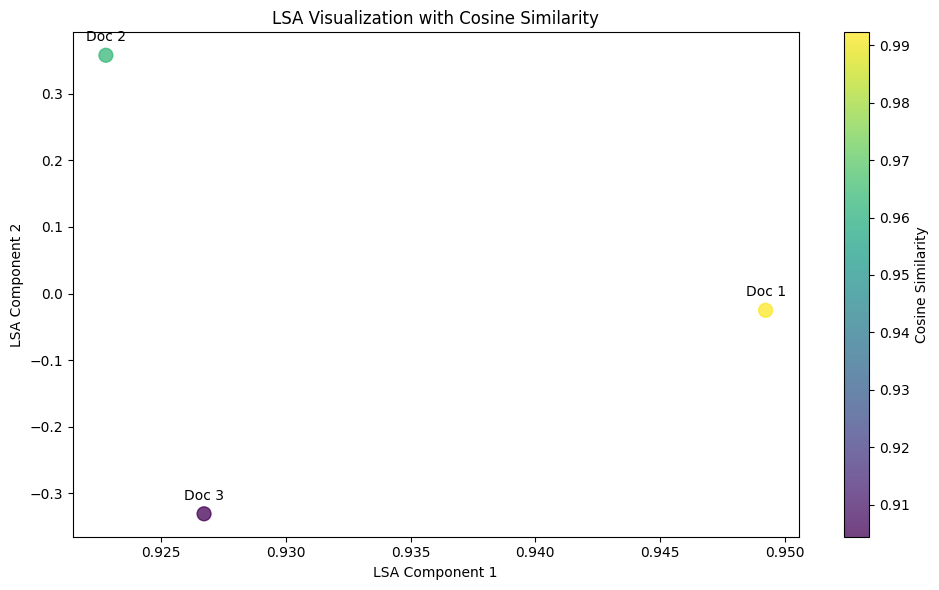

In [ ]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Extract text from PDFs
pdf_paths = ['icici_q1_by_idbi.pdf', 'icici_q2_by_idbi.pdf', 'icici_q3_by_idbi.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Apply LSI (using TruncatedSVD)
n_components = 2  # Number of dimensions for LSI
lsa = TruncatedSVD(n_components=n_components)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Sample query
query = "credit growth"
query_vec = vectorizer.transform([query])
query_lsa = lsa.transform(query_vec)

# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_lsa, lsa_matrix).flatten()

# Get document rankings
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
ranked_documents = [(idx+1, cosine_similarities[idx], documents[idx][:500]) for idx in ranked_doc_indices]
print(ranked_documents)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=cosine_similarities, cmap='viridis', s=100, alpha=0.75)
plt.colorbar(label='Cosine Similarity')
plt.title('LSA Visualization with Cosine Similarity')
plt.xlabel('LSA Component 1')
plt.ylabel('LSA Component 2')

# Annotate documents
for i, txt in enumerate(ranked_doc_indices):
    plt.annotate(f"Doc {txt+1}", (lsa_matrix[i, 0], lsa_matrix[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


# Text Retrieval using SentenceTransformer model

This code leverages Pinecone for efficient vector indexing and retrieval of embeddings generated by a SentenceTransformer model from paragraphs extracted from PDF documents. It demonstrates an end-to-end workflow from index creation to querying for relevant information based on textual embeddings.



In [ ]:
!pip install pinecone sentence_transformers pinecone-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-many

In [ ]:
import pinecone
from sentence_transformers import SentenceTransformer
import pdfplumber

from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(
    api_key='49d4cc5d-f136-4c4b-a624-cba32497bd6c'
)

index_name = "icici-reports"
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'
        )
    )

index = pc.Index(index_name)

model = SentenceTransformer('all-MiniLM-L6-v2')

def extract_text_from_pdf(file_path):
    """Extract text from PDF using pdfplumber."""
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text


pdf_files = ['/content/icici_q1_by_idbi.pdf', '/content/icici_q2_by_idbi.pdf', '/content/icici_q3_by_idbi.pdf']

for i, pdf_file in enumerate(pdf_files):
    text = extract_text_from_pdf(pdf_file)
    paragraphs = text.split('\n\n')
    embeddings = model.encode(paragraphs)

    for j, embedding in enumerate(embeddings):
        doc_id = f'doc_{i}_para_{j}'
        index.upsert([(doc_id, embedding.tolist())])


def query_index(query, top_k=10):
    query_embedding = model.encode([query])
    result = index.query(vector=query_embedding[0].tolist(), top_k=top_k)
    return result

query_result = query_index("NIM decline in Q2FY24")
print(query_result)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

{'matches': [{'id': 'doc_1_para_0', 'score': 0.548125446, 'values': []},
             {'id': 'doc_0_para_0', 'score': 0.500361383, 'values': []},
             {'id': 'doc_2_para_0', 'score': 0.4800044, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}


In [ ]:
import pinecone
from sentence_transformers import SentenceTransformer
import pdfplumber
import matplotlib.pyplot as plt

from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(
    api_key='49d4cc5d-f136-4c4b-a624-cba32497bd6c'
)

index_name = "icici-reports"
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'
        )
    )

index = pc.Index(index_name)

model = SentenceTransformer('all-MiniLM-L6-v2')

def extract_text_from_pdf(file_path):
    """Extract text from PDF using pdfplumber."""
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text


pdf_files = ['/content/icici_q1_by_idbi.pdf', '/content/icici_q2_by_idbi.pdf', '/content/icici_q3_by_idbi.pdf']

for i, pdf_file in enumerate(pdf_files):
    text = extract_text_from_pdf(pdf_file)
    paragraphs = text.split('\n\n')
    embeddings = model.encode(paragraphs)

    for j, embedding in enumerate(embeddings):
        doc_id = f'doc_{i}_para_{j}'
        index.upsert([(doc_id, embedding.tolist())])


def query_index(query, top_k=10):
    try:
        query_embedding = model.encode([query])
        result = index.query(vector=query_embedding[0].tolist(), top_k=top_k)
        return result
    except pinecone.exceptions.PineconeException as e:
        print(f"Error querying Pinecone index: {e}")
        return None

query_result = query_index("NIM decline in Q2FY24")

if query_result is not None and query_result.results is not None:
    # Extract scores and document IDs from query result
    scores = [res.score for res in query_result.results]
    document_ids = [res.id for res in query_result.results]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(document_ids, scores, color='skyblue')
    plt.xlabel('Cosine Similarity Score')
    plt.ylabel('Document IDs')
    plt.title('Top Documents Similar to Query: "NIM decline in Q2FY24"')
    plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top
    plt.tight_layout()
    plt.show()
else:
    print("No results found for the query.")


No results found for the query.
